In [1]:
import os
import pandas as pd
import pretty_midi as pm
from collections import Counter
import matplotlib.pyplot as plt

from utils.files_utils import data_path
from utils.hdf5_utils import hdf5_getters

In [4]:
list(filter(lambda x: x[:3] == 'get', hdf5_getters.__dict__.keys()))

['get_num_songs',
 'get_artist_familiarity',
 'get_artist_hotttnesss',
 'get_artist_id',
 'get_artist_mbid',
 'get_artist_playmeid',
 'get_artist_7digitalid',
 'get_artist_latitude',
 'get_artist_longitude',
 'get_artist_location',
 'get_artist_name',
 'get_release',
 'get_release_7digitalid',
 'get_song_id',
 'get_song_hotttnesss',
 'get_title',
 'get_track_7digitalid',
 'get_similar_artists',
 'get_artist_terms',
 'get_artist_terms_freq',
 'get_artist_terms_weight',
 'get_analysis_sample_rate',
 'get_audio_md5',
 'get_danceability',
 'get_duration',
 'get_end_of_fade_in',
 'get_energy',
 'get_key',
 'get_key_confidence',
 'get_loudness',
 'get_mode',
 'get_mode_confidence',
 'get_start_of_fade_out',
 'get_tempo',
 'get_time_signature',
 'get_time_signature_confidence',
 'get_track_id',
 'get_segments_start',
 'get_segments_confidence',
 'get_segments_pitches',
 'get_segments_timbre',
 'get_segments_loudness_max',
 'get_segments_loudness_max_time',
 'get_segments_loudness_start',
 'ge

____

In [2]:
h5_paths = [os.path.join(folder[0], file_path) for folder in os.walk(os.path.join(data_path, 'datasets/lmd_matched_h5/')) for file_path in folder[2] if os.path.splitext(file_path)[1] == '.h5']
h5_paths

['/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/A/TRAAAGR128F425B14B.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/A/TRAAAZF12903CCCF6B.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/B/TRAABVM128F92CA9DC.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/B/TRAABXH128F42955D6.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/C/TRAACQE12903CC706C.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/D/TRAADKW128E079503A.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/E/TRAAEEH128E0795DFE.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/E/TRAAEJH128E0785506.h5',
 '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched_h5/A/A/F/TRAAFMT128F429DB58.h5',
 '/home/ur

In [3]:
def b_to_str(s):
    return s.decode('UTF-8')

In [4]:
d = {"Artist": [], "Title": [], "Idx": [], "Tags": [], "Path": []}
for h5_file in h5_paths:
    h5 = hdf5_getters.open_h5_file_read(h5_file)
    n = hdf5_getters.get_num_songs(h5)
    for i in range(n):
        tags = hdf5_getters.get_artist_mbtags(h5, i)
        for tag in tags:
            d["Artist"].append(b_to_str(hdf5_getters.get_artist_name(h5, i)))
            d["Title"].append(b_to_str(hdf5_getters.get_title(h5, i)))
            d["Idx"].append(i)
            d["Tags"].append(b_to_str(tag))

            folders = h5_file.split('/')
            f1 = folders[-4]
            f2 = folders[-3]
            f3 = folders[-2]
            last_folder = os.path.splitext(folders[-1])[0]
            d["Path"].append(f"{f1}/{f2}/{f3}/{last_folder}")
    h5.close()

df = pd.DataFrame(d)
df

,Artist,Title,Idx,Tags,Path
0,Cyndi Lauper,Into The Nightlife,0,classic pop and rock,A/A/A/TRAAAGR128F425B14B
1,Brian Wilson,Keep An Eye On Summer (Album Version),0,classic pop and rock,A/A/B/TRAABXH128F42955D6
2,Tracy Chapman,Fast Car (LP Version),0,folk,A/A/D/TRAADKW128E079503A
3,Tracy Chapman,Fast Car (LP Version),0,american,A/A/D/TRAADKW128E079503A
4,Tracy Chapman,Fast Car (LP Version),0,classic pop and rock,A/A/D/TRAADKW128E079503A
...,...,...,...,...,...
62440,George Harrison,I Don't Want To Do It (2009 Digital Remaster),0,my sweet lord,Z/Z/Y/TRZZYTX128F92EBE33
62441,George Harrison,I Don't Want To Do It (2009 Digital Remaster),0,folk,Z/Z/Y/TRZZYTX128F92EBE33
62442,George Harrison,I Don't Want To Do It (2009 Digital Remaster),0,uk,Z/Z/Y/TRZZYTX128F92EBE33
62443,George Harrison,I Don't Want To Do It (2009 Digital Remaster),0,united kingdom,Z/Z/Y/TRZZYTX128F92EBE33


___


In [17]:
df[df["Tags"] == "classical"]

,Artist,Title,Idx,Tags,Path
559,Andrea Bocelli / Giorgia,Vivo Per Lei,0,classical,A/E/O/TRAEOOG128F148B494
671,Dinu Lipatti_ Orchestre de la Suisse Romande_ ...,Piano Sonata No. 8 In A Minor KV 310 - II. And...,0,classical,A/F/T/TRAFTBP128F4251C29
792,Antonio Vivaldi,L'été : Adagio,0,classical,A/G/Q/TRAGQGC12903C9C3D0
811,Jean-Yves Thibaudet / Gewandhausorchester Leip...,1. Molto allegro con fuoco,0,classical,A/G/X/TRAGXBC128F148E5CC
836,Antonin Dvorak,Slavonic Dance No 4 in F major,0,classical,A/H/K/TRAHKNR12903CF5E7A
...,...,...,...,...,...
62226,James Galway,Perhaps Love,0,classical,Z/X/J/TRZXJHC128F42852BA
62232,Murray Perahia,Sonata No. 28 in A Major for Piano_ Op. 101/I....,0,classical,Z/X/S/TRZXSJN128F4280BA9
62250,Leif Ove Andsnes,Lyric Pieces_ Bk III Op. 43: I. Butterfl...,0,classical,Z/Y/B/TRZYBWV128F426E29F
62312,Katherine Jenkins,Somewhere Over The Rainbow LIVE,0,classical,Z/Y/K/TRZYKTR12903D00F70


In [14]:
df[df["Idx"] > 0]

,Artist,Title,Idx,Tags,Path


In [22]:
nombre_ejemplo = 'TRAAAGR128F425B14B'
example_file = os.path.join(data_path, f'datasets/lmd_matched_h5/A/A/A/{nombre_ejemplo}.h5')

In [4]:
h5 = hdf5_getters.open_h5_file_read(example_file)
song = hdf5_getters.get_song_id(h5)
h5.close()
type(song)

b'SOQJBXJ12AC46867E0'

In [8]:
len(song.decode('UTF-8')), len(nombre_ejemplo)

(18, 18)

In [16]:
def b_to_str(s):
    return s.decode('UTF-8')

def get_song_path():
    ...

def get_songs_dirs(genres):
    songs_dirs = []
    for h5_path in h5_paths:
        h5 = hdf5_getters.open_h5_file_read(h5_path)
        for songidx in range(hdf5_getters.get_num_songs(h5)):
            tags = hdf5_getters.get_artist_mbtags(h5, songidx)
            for tag in tags:
                if b_to_str(tag) in genres:
                    folders = h5_path.split('/')
                    f1 = folders[-4]
                    f2 = folders[-3]
                    f3 = folders[-2]
                    last_folder = os.path.splitext(folders[-1])[0]
                    songs_dirs.append(os.path.join(data_path, 'datasets/lmd_matched', f1, f2, f3, last_folder, hdf5_getters.get_song_id(h5, songidx)))
                    break
        h5.close()
    return songs_dirs

pop_dirs = get_songs_dirs(['pop'])
len(pop_dirs), pop_dirs

(2392,
 ['/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/G/TRAAGCZ128F93210FD/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/H/TRAAHOQ12903CC6A5A/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/N/TRAANZE128F148BF55/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/Q/TRAAQZY128F9364CC3/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/R/TRAARCW12903CEB779/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/S/TRAASKR128F92DF3D1/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/Y/TRAAYGH128F92ECD16/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/A/Z/TRAAZVG128F425A9BD/0',
  '/home/urania/Documentos/Tesis/src/style-transfer/data/datasets/lmd_matched/A/B/A/TRABAFJ128F42AF24E/0',
  '/home/urania/Documentos/Tes

In [31]:
h5 = hdf5_getters.open_h5_file_read(example_file)
s = hdf5_getters.get_song_id(h5, 0)
a = hdf5_getters.get_audio_md5(h5)
n = hdf5_getters.get_num_songs(h5)
t = hdf5_getters.get_track_id(h5)
d = hdf5_getters.get_track_7digitalid(h5)
h5.close()
n, s, a, t, d

(1,
 b'SONRWUU12AF72A4283',
 b'7573fabe891b25bcd3c5866e4c5df1f0',
 b'TRAAAGR128F425B14B',
 3110092)

In [14]:
x = 0
for d in pop_dirs:
    x += len(os.listdir(d))
x

10318

___

In [ ]:
h5 = hdf5_getters.open_h5_file_read(example_file)
tags = hdf5_getters.get_artist_mbtags(h5)
terms = hdf5_getters.get_artist_terms(h5)
freq = hdf5_getters.get_artist_terms_freq(h5)
weight = hdf5_getters.get_artist_terms_weight(h5)
h5.close()

terms, freq

In [41]:
tags

array([], dtype='|S256')

In [31]:
tags = hdf5_getters.get_artist_mbtags(h5)
h5.close()
tags

array([b'classic pop and rock'], dtype='|S256')

In [20]:
len(h5_paths)

31034

In [47]:
c = Counter()

for f in h5_paths:
    h5 = hdf5_getters.open_h5_file_read(f)
    tags = list(hdf5_getters.get_artist_terms(h5))
    mb_tags = list(hdf5_getters.get_artist_mbtags(h5))
    for tag in mb_tags:
        c[tag] += 1
    #     s.add(tag)
    h5.close()
c

Counter({b'classic pop and rock': 4009,
         b'folk': 791,
         b'american': 2854,
         b'acoustic': 18,
         b'am\xc3\xa9ricain': 548,
         b'usa': 728,
         b'contemporary folk': 10,
         b'rock': 3445,
         b'blues': 200,
         b'british': 2750,
         b'rock blues': 9,
         b'country': 557,
         b'southern rock': 77,
         b'outlaw country': 28,
         b'german': 633,
         b'post-emo': 39,
         b'emo-pop': 39,
         b'pop and chart': 1509,
         b'pop': 2392,
         b'will i am': 10,
         b'fergie': 10,
         b'united states': 391,
         b'french': 554,
         b'english': 2116,
         b'uk': 2445,
         b'beat': 8,
         b'psychedelic pop': 15,
         b'rock and indie': 1486,
         b'techno': 85,
         b'alternative rock': 889,
         b'space rock': 37,
         b'britannique': 377,
         b'dream pop': 33,
         b'neo-psychedelia': 16,
         b'britpop': 55,
         b'soul centr

<BarContainer object of 1275 artists>

/home/urania/Documentos/Tesis/venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12495 (\N{KATAKANA LETTER HA}) missing from current font.
  func(*args, **kwargs)
/home/urania/Documentos/Tesis/venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from current font.
  func(*args, **kwargs)
/home/urania/Documentos/Tesis/venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
/home/urania/Documentos/Tesis/venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  func(*args, **kwargs)
/home/urania/Documentos/Tesis/venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from current font.
  func(*args, **kwargs)
/home/urania/Documentos/T

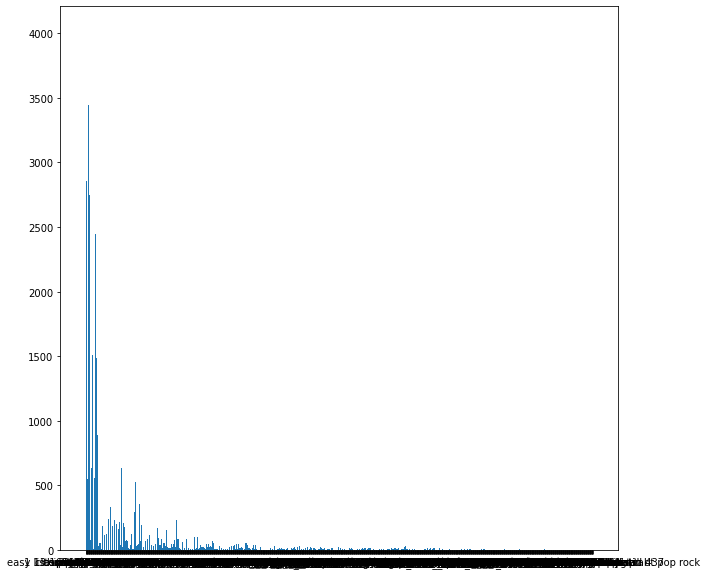

In [48]:
plt.figure(figsize=(10,10))
plt.bar(c.keys(), c.values())

In [49]:
c2 = Counter()

for k, v in c.items():
    if v > 500:
        c2[k] = v
c2

Counter({b'classic pop and rock': 4009,
         b'folk': 791,
         b'american': 2854,
         b'am\xc3\xa9ricain': 548,
         b'usa': 728,
         b'rock': 3445,
         b'british': 2750,
         b'country': 557,
         b'german': 633,
         b'pop and chart': 1509,
         b'pop': 2392,
         b'french': 554,
         b'english': 2116,
         b'uk': 2445,
         b'rock and indie': 1486,
         b'alternative rock': 889,
         b'electronic': 952,
         b'european': 813,
         b'hard rock': 631,
         b'pop rock': 529,
         b'metal': 578,
         b'classical': 593})

<BarContainer object of 22 artists>

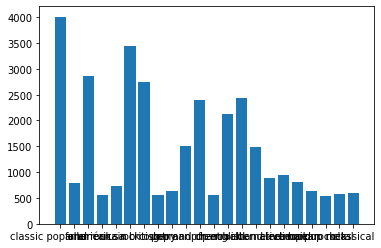

In [50]:
plt.bar(c2.keys(), c2.values())